# Importing of classes #

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from IPython.display import display
import joblib


# Data Exploration and Reading # 
The data is about predicting the price of the flight tickets. The data is given in the form of a csv file. The data is read using the pandas library. The data is then explored to get a better understanding of the data.

### Importing the dataset 

In [2]:
data = pd.read_csv('Data/Clean_Dataset.csv')
print(data)

        Unnamed: 0   airline   flight source_city departure_time stops  \
0                0  SpiceJet  SG-8709       Delhi        Evening  zero   
1                1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2                2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3                3   Vistara   UK-995       Delhi        Morning  zero   
4                4   Vistara   UK-963       Delhi        Morning  zero   
...            ...       ...      ...         ...            ...   ...   
300148      300148   Vistara   UK-822     Chennai        Morning   one   
300149      300149   Vistara   UK-826     Chennai      Afternoon   one   
300150      300150   Vistara   UK-832     Chennai  Early_Morning   one   
300151      300151   Vistara   UK-828     Chennai  Early_Morning   one   
300152      300152   Vistara   UK-822     Chennai        Morning   one   

         arrival_time destination_city     class  duration  days_left  price  
0               Night           

### Dataset cleaning
- Assumption:
     - The data set original data set is too big to be processed in a reasonable time.
     - Reduce the dataset into 5000 rows.

In [49]:
#Cleans the dataset to show only the columns that are needed
#Reduce the number of rows to 5000 from 300153
#index_col=0 removes the index column
new_data = pd.read_csv('Data/Clean_Dataset.csv', nrows=5000, index_col=0)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           5000 non-null   object 
 1   flight            5000 non-null   object 
 2   source_city       5000 non-null   object 
 3   departure_time    5000 non-null   object 
 4   stops             5000 non-null   object 
 5   arrival_time      5000 non-null   object 
 6   destination_city  5000 non-null   object 
 7   class             5000 non-null   object 
 8   duration          5000 non-null   float64
 9   days_left         5000 non-null   int64  
 10  price             5000 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 468.8+ KB


#### Checking for Missing Data

In [50]:
new_data.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

#### Conclusion
There is no need to fill in missing data as there is no missing data.

#### Feature Selection
- Assumption:
     - The feature flight according to domain knowledge is not important.
     - Reason:
        - The flight number is not important as the flight number does not have any relation with the price of the flight.
    

In [51]:
del new_data["flight"]
new_data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


#### Conclusion
The feature flight is removed from the dataset.

#### Data Cleaning Conclusion
To conclude, the dataset is cleaned and ready for further analysis.
The dataset needs to be reduced due to it being too big to process on my computer.
The dataset also needs to be reduced because of the fear of overfitting.
This is done by randomly selecting 5000 rows from the original dataset.
Hence, the dataset is reduced to 5000 rows.



## Data Exploration
The data exploration is done to get a better understanding of the data. The data is explored using the plotlib library. The data is explored using the following methods:
- Histogram
- Scatter plot
- Box plot


##### Scatter Plot of Price vs Airline

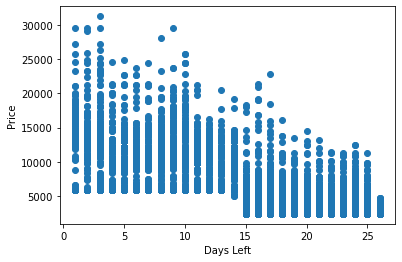

In [59]:
#Creates a new column called 'price' and sets it to the value of the 'price' column
plt.scatter(new_data['days_left'], new_data['price'])
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.show()

### Scatter Plot Conclusion
Looking at the scatter plot, it is clear that the price of the flight ticket is related to the type of Airline. This maybe because of the Airline company charging the prices of the flight. Hence, affecting the cost of the price of the ticket.

#### Scatter Plot of Price vs Duration

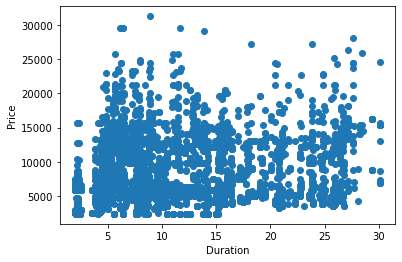

In [53]:
plt.scatter(new_data['duration'], new_data['price'])
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()

#### Scatter Plot Conclusion
Through the scatter plot, it can be seen that there is a form of a gradient in the data. This means that the price of the ticket is related to the duration of the flight. This maybe because of the Airline company charging the prices of the flight. Hence, affecting the cost of the price of the ticket.

#### Histogram of Price

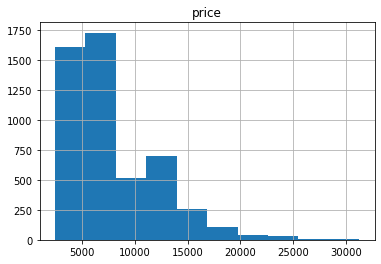

In [57]:
histogram = new_data.hist(column='price')

#### Histogram Conclusion
The histogram shows that there is a high frequency of the price of the ticket being between 0 and 10000. This maybe because of the Airline company charging the prices of the flight. Hence, affecting the cost of the price of the ticket.

#### Bar Graph of Airline Column

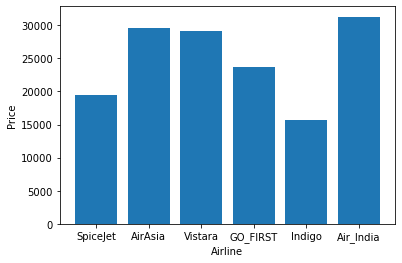

In [64]:
plt.bar(new_data['airline'], new_data['price'])
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()

#### Bar Graph Conclusion
The bar graph shows that Air_India has the highest price cost of the ticket. This could be due to the Airline company charging the prices of the flight. Hence, affecting the cost of the price of the ticket.

### One-hot encoding of columns
Assumption:
 - Remove the column flight:
     - Reason: 
        1. Using domain knowledge, we know that the plane's flight number does not affect the price. The plane's flight number is only a unique indication of which plane's flight is. Hence, we can remove the column flight.

In [5]:
features_df = pd.get_dummies(new_data)
features_df.head()

,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Delhi,...,stops_two_or_more,stops_zero,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Mumbai,class_Economy
0,2.17,1,5953,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,1,1,1
1,2.33,1,5953,0,0,0,0,1,0,1,...,0,1,0,0,0,0,1,0,1,1
2,2.17,1,5956,1,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,1
3,2.25,1,5955,0,0,0,0,0,1,1,...,0,1,1,0,0,0,0,0,1,1
4,2.33,1,5955,0,0,0,0,0,1,1,...,0,1,0,0,0,0,1,0,1,1


Deleted the price column due to it being the column being predicted.

In [6]:
del features_df['price']
features_df.head()

,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Delhi,departure_time_Afternoon,...,stops_two_or_more,stops_zero,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Mumbai,class_Economy
0,2.17,1,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,1,1,1
1,2.33,1,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,1,0,1,1
2,2.17,1,1,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,1
3,2.25,1,0,0,0,0,0,1,1,0,...,0,1,1,0,0,0,0,0,1,1
4,2.33,1,0,0,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,1


### Splitting the data into train and test data

Assumption:
The train_size of the code should be 70% of the code. This is to allow more data to be trained into the model.

In [7]:
#Splits the new data into training and testing sets
X = features_df.values
y = new_data['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=7)

### Grid Search
This is to find out which parameters would work best with the Gradient Boosting Regressor
 - Assumption:
     - The param_grids are set to test these fields for the hyper parameters of gradient boosting

In [8]:
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [500, 1000, 3000],
    'max_depth': [4, 6],
    'min_samples_leaf': [3, 5, 9, 17],
    'learning_rate': [0.1, 0.05, 0.02, 0.01],
    'max_features': [1.0, 0.3, 0.1],
    'loss': ['squared_error', 'lad', 'huber']
}

# Create the model
model = ensemble.GradientBoostingRegressor()

# Define the grid search we want to run. Run it with all cpus in parallel.
gs_cv = GridSearchCV(model, param_grid, n_jobs=-1, verbose=100)
gs_cv.fit(X_train, y_train)

# Print the parameters that gave us the best result!
print(gs_cv.best_params_)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


c:\Users\AngJi\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2880 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\AngJi\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\AngJi\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 420, in fit
    self._validate_params()
  File "c:\Users\AngJi\miniconda3\lib\site-packages\sklearn\base.py", line 570, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\AngJi\miniconda3\lib\site-pa

{'learning_rate': 0.02, 'loss': 'huber', 'max_depth': 6, 'max_features': 0.3, 'min_samples_leaf': 3, 'n_estimators': 3000}


### Gradient Boosting Regressor
This is to find out which parameters would work best with the Gradient Boosting Regressor
 - Assumption:
     - The param_grids are set to test these fields for the hyper parameters of gradient boosting